## Cálculo do Retorno de uma Carteira de Ações


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [2]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.085),
    ("VALE3.SA", 0.085),
    ("PETR4.SA", 0.085),
    ("ARZZ3.SA", 0.025),
    ("LREN3.SA", 0.025),
    ("GRND3.SA", 0.025),
    ("ABEV3.SA", 0.085),
    ("MDIA3.SA", 0.025),
    ("SLCE3.SA", 0.025),
    ("PSSA3.SA", 0.040),
    ("ITUB3.SA", 0.085),
    ("BBDC4.SA", 0.000),
    ("BBAS3.SA", 0.085),
    ("RADL3.SA", 0.040),
    ("ODPV3.SA", 0.025),
    ("FLRY3.SA", 0.025),
    ("HYPE3.SA", 0.025),
    ("VIVT3.SA", 0.040),
    ("EGIE3.SA", 0.085),
    ("EQTL3.SA", 0.085),
)

usa_tickers_n_weights = (
    ("MMM", 0.03571428571),
    ("WST", 0.03571428571),
    ("PG", 0.03571428571),
    ("JPM", 0.03571428571),
    ("TXN", 0.03571428571),
    ("ROST", 0.03571428571),
    ("JNJ", 0.03571428571),
    ("PAYX", 0.03571428571),
    ("FAST", 0.03571428571),
    ("EXPD", 0.03571428571),
    ("NKE", 0.03571428571),
    ("DIS", 0.03571428571),
    ("TTC", 0.03571428571),
    ("AAPL", 0.03571428571),
    ("UNH", 0.03571428571),
    ("ADBE", 0.03571428571),
    ("GOOGL", 0.03571428571),
    ("COST", 0.03571428571),
    ("ANSS", 0.03571428571),
    ("HD", 0.03571428571),
    ("ACN", 0.03571428571),
    ("BLK", 0.03571428571),
    ("MSFT", 0.03571428571),
    ("VNQ", 0.03571428571),
    ("VOO", 0.03571428571),
    ("VIOV", 0.03571428571),
    ("VBR", 0.03571428571),
    ("VPL", 0.03571428571),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [3]:
br_stock_data = pd.DataFrame()
br_index_data = pd.DataFrame()
usa_stock_data = pd.DataFrame()
usa_index_data = pd.DataFrame()
start_date: str = "2011-02-02"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

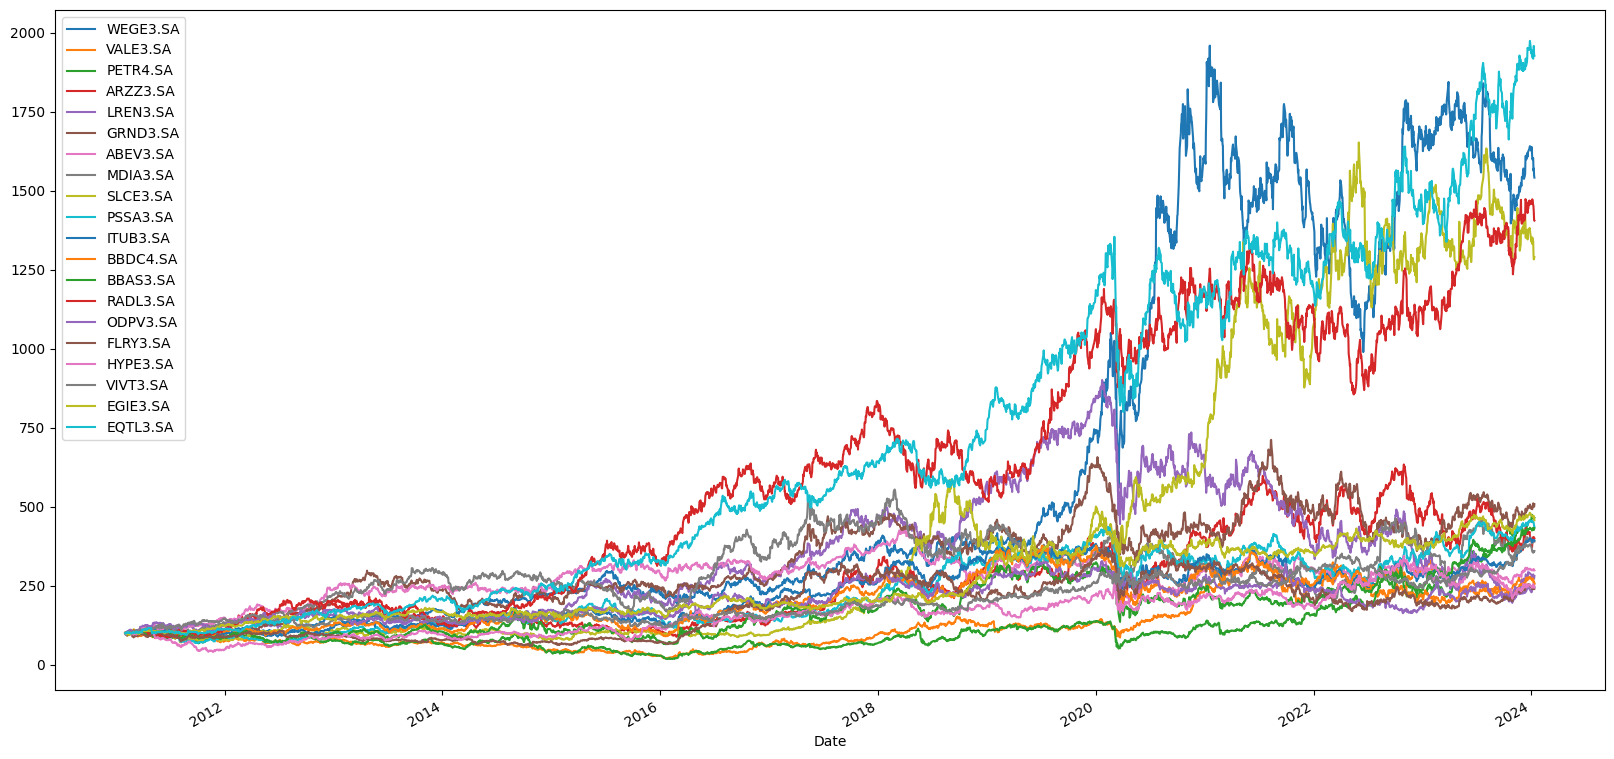

In [4]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

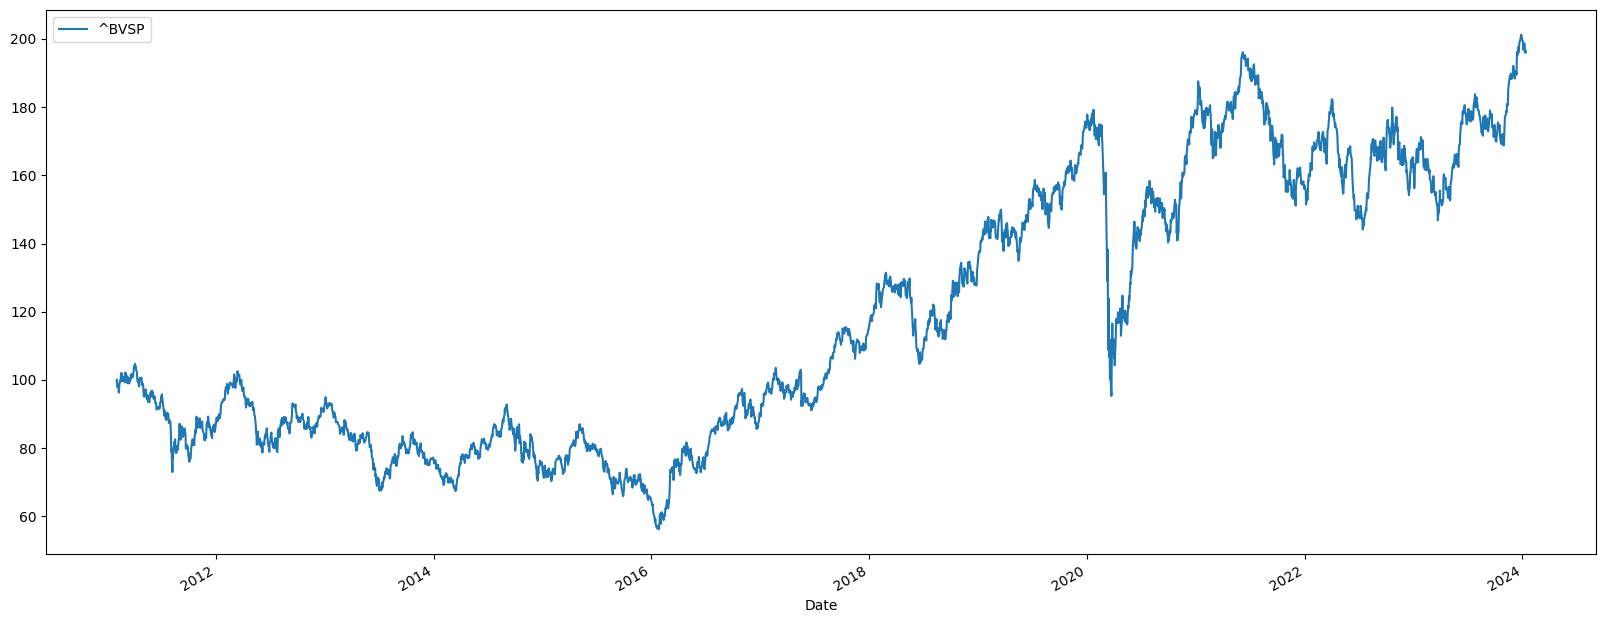

In [5]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

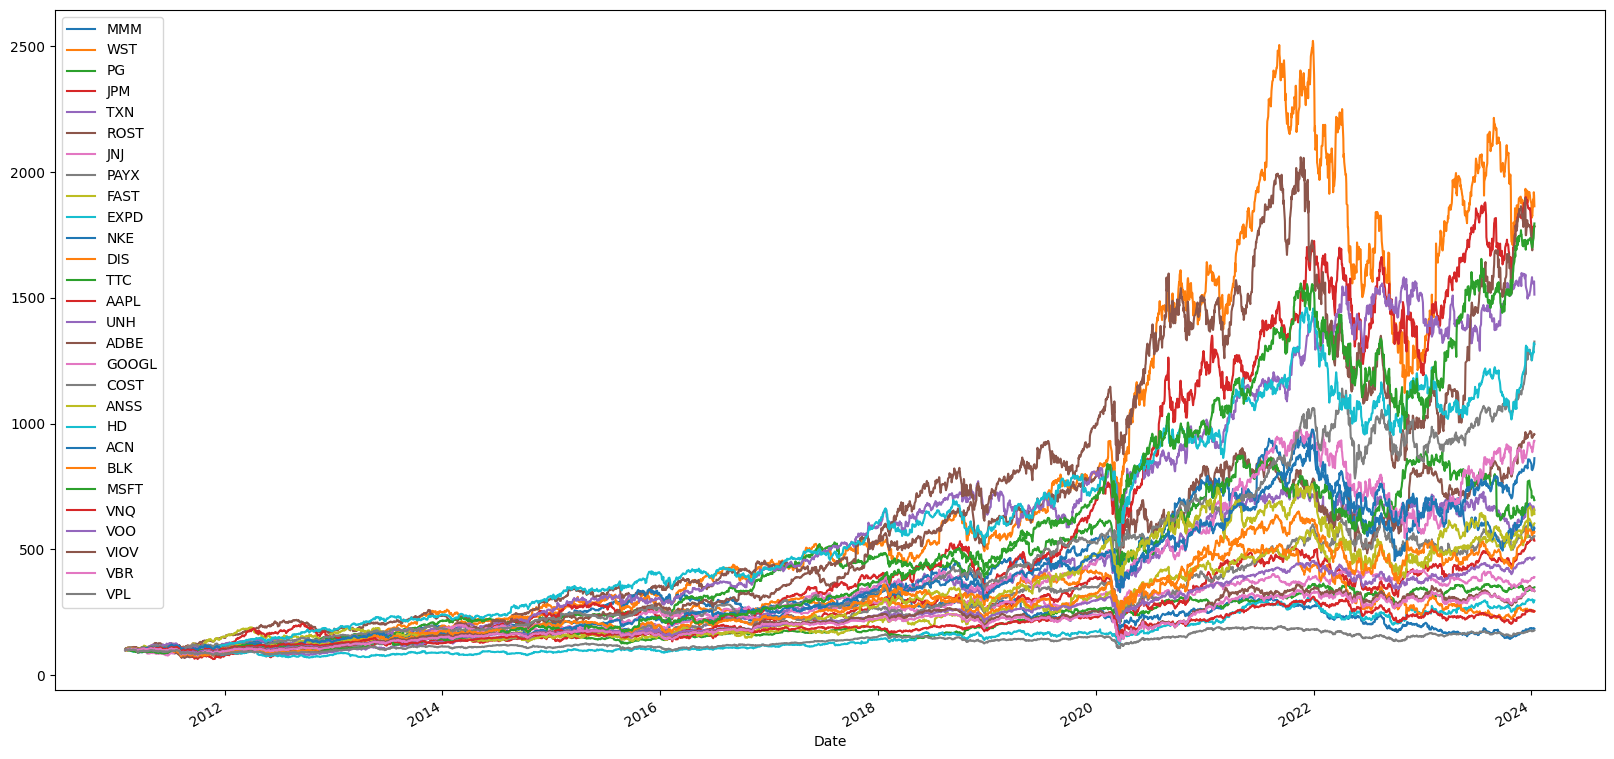

In [6]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

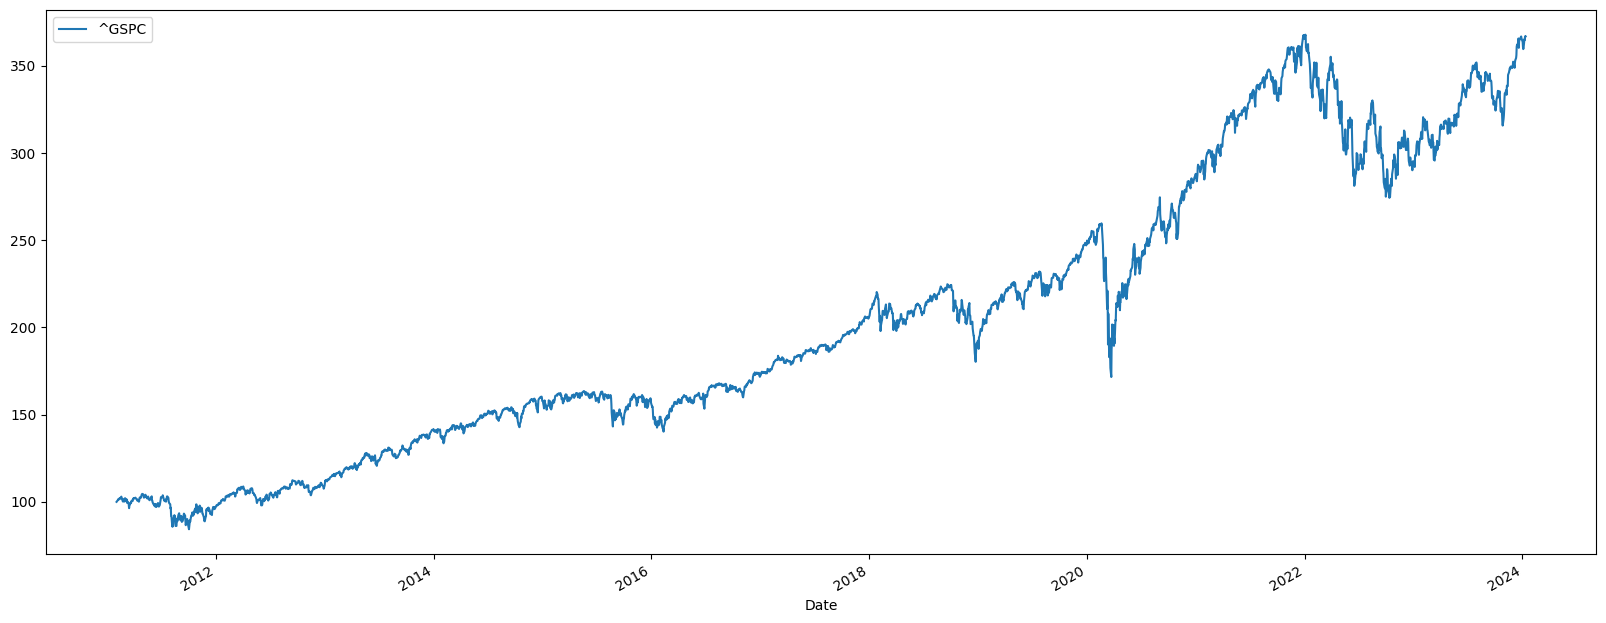

In [7]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [8]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [9]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [10]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.263298
VALE3.SA    0.158607
PETR4.SA    0.227547
ARZZ3.SA    0.186114
LREN3.SA    0.153262
GRND3.SA    0.175834
ABEV3.SA    0.119105
MDIA3.SA    0.162309
SLCE3.SA    0.263463
PSSA3.SA    0.159489
ITUB3.SA    0.150037
BBDC4.SA    0.130712
BBAS3.SA    0.195642
RADL3.SA    0.255619
ODPV3.SA    0.119177
FLRY3.SA    0.118704
HYPE3.SA    0.126839
VIVT3.SA    0.139555
EGIE3.SA    0.146317
EQTL3.SA    0.266767
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [11]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

MMM      0.071988
WST      0.261095
PG       0.111201
JPM      0.167087
TXN      0.180666
ROST     0.217963
JNJ      0.118885
PAYX     0.156890
FAST     0.173389
EXPD     0.112804
NKE      0.174057
DIS      0.105951
TTC      0.178579
AAPL     0.261116
UNH      0.240141
ADBE     0.269624
GOOGL    0.208072
COST     0.219423
ANSS     0.184354
HD       0.225377
ACN      0.194987
BLK      0.171909
MSFT     0.255854
VNQ      0.092491
VOO      0.133558
VIOV     0.117789
VBR      0.115200
VPL      0.059041
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [12]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 17.77 %
Rentabilidade Média Anual do Índice BR: 8.24 %

Rentabilidade Média Anual do Portfólio USA: 17.07 %
Rentabilidade Média Anual do Índice USA: 11.50 %


O retorno desta carteira é satisfatório?
